In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pseudo-Inverse and Singular Value Decomposition
Task: Implement the pseudo-inverse using SVD

In [2]:
def compute_pseudoinverse(K, tol=1e-10):
    """
    Compute the pseudo-inverse of a matrix using SVD.
    
    Parameters:
    -----------
    K : ndarray
        Input matrix
    tol : float
        Tolerance for zero singular values
        
    Returns:
    --------
    K_dagger : ndarray
        Pseudo-inverse of K
    """
    U, s, Vh = np.linalg.svd(K, full_matrices=False)
    
    # Find indices of non-zero singular values
    nonzero_idx = s > tol * s[0]
    
    # Compute inverse of non-zero singular values
    s_inv = np.zeros_like(s)
    s_inv[nonzero_idx] = 1.0 / s[nonzero_idx]
    
    # Compute pseudo-inverse
    K_dagger = (Vh.T @ np.diag(s_inv) @ U.T)
    
    return K_dagger

In [3]:
def verify_pseudoinverse_properties():
    """Verify key properties of the pseudo-inverse."""
    # Create a rectangular matrix
    m, n = 8, 5  # m > n, overdetermined system
    K = np.random.randn(m, n)
    
    # Compute pseudo-inverse
    K_dagger = compute_pseudoinverse(K)
    
    # Property 1: KK† is an orthogonal projection onto range(K)
    KK_dagger = K @ K_dagger
    
    # Property 2: I - K†K is an orthogonal projection onto null(K)
    I_minus_KdaggerK = np.eye(n) - K_dagger @ K
    
    # Check if KK† is idempotent (P² = P)
    KK_dagger_squared = KK_dagger @ KK_dagger
    is_idempotent1 = np.allclose(KK_dagger, KK_dagger_squared)
    
    # Check if I - K†K is idempotent
    I_minus_KdaggerK_squared = I_minus_KdaggerK @ I_minus_KdaggerK
    is_idempotent2 = np.allclose(I_minus_KdaggerK, I_minus_KdaggerK_squared)
    
    print("Property verification for pseudo-inverse:")
    print(f"1. Is KK† idempotent? {is_idempotent1}")
    print(f"2. Is I - K†K idempotent? {is_idempotent2}")
    
    # For visualization: eigenvalues should be 0 or 1 for projections
    eig_KK_dagger = np.linalg.eigvals(KK_dagger)
    eig_I_minus_KdaggerK = np.linalg.eigvals(I_minus_KdaggerK)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(np.real(eig_KK_dagger), np.imag(eig_KK_dagger), alpha=0.7)
    plt.title('Eigenvalues of KK†')
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(x=1, color='r', linestyle='--', alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.scatter(np.real(eig_I_minus_KdaggerK), np.imag(eig_I_minus_KdaggerK), alpha=0.7)
    plt.title('Eigenvalues of I - K†K')
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(x=1, color='r', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Property verification for pseudo-inverse:
1. Is KK† idempotent? True
2. Is I - K†K idempotent? True


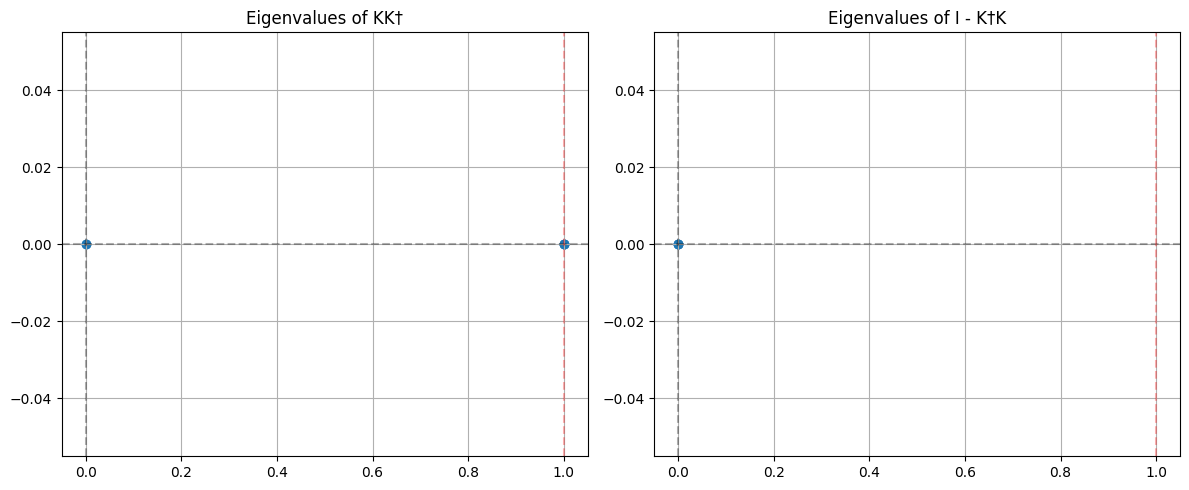

In [4]:
verify_pseudoinverse_properties()

# Least-Squares and Minimum Norm Solutions

Task: compute a least-squares solution for an overdetermined system
- use SVD for pseudo-inverse
- use normal equations for pseudo-inverse
- check both approaches yield the same solution
- plot contour of the residual and visualize the solution

In [5]:
def overdetermined_system():
    """Explore least-squares solution for an overdetermined system."""
    # Create a simple overdetermined system
    K = np.array([[1, 1], 
                  [2, 1], 
                  [1, 2]])
    f = np.array([1, 1, 1])
    
    # Compute the pseudo-inverse solution
    K_dagger = compute_pseudoinverse(K)
    u_pinv = K_dagger @ f
    
    # Compute the least-squares solution using normal equations
    u_ls = np.linalg.inv(K.T @ K) @ K.T @ f
    
    # Check the residual
    residual = np.linalg.norm(K @ u_pinv - f)
    
    print("Overdetermined system (m > n):")
    print(f"Pseudo-inverse solution: {u_pinv}")
    print(f"Least-squares solution: {u_ls}")
    print(f"Are they the same? {np.allclose(u_pinv, u_ls)}")
    print(f"Residual norm: {residual}")
    
    # Visualize the solution
    if K.shape[1] == 2:  # Only for 2D case
        plt.figure(figsize=(8, 6))
        
        # Create a grid for visualization
        x = np.linspace(-1, 2, 100)
        y = np.linspace(-1, 2, 100)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros_like(X)
        
        # Compute residual over the grid
        for i in range(len(x)):
            for j in range(len(y)):
                u = np.array([X[i, j], Y[i, j]])
                Z[i, j] = np.linalg.norm(K @ u - f)
        
        # Plot the contour of the residual
        plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.8)
        plt.colorbar(label='Residual norm')
        
        # Plot the solution
        plt.scatter(u_pinv[0], u_pinv[1], color='red', s=100, label='Solution')
        
        plt.grid(True)
        plt.axis('equal')
        plt.title('Least-squares solution')
        plt.xlabel('$u_1$')
        plt.ylabel('$u_2$')
        plt.legend()
        plt.show()

Overdetermined system (m > n):
Pseudo-inverse solution: [0.36363636 0.36363636]
Least-squares solution: [0.36363636 0.36363636]
Are they the same? True
Residual norm: 0.3015113445777636


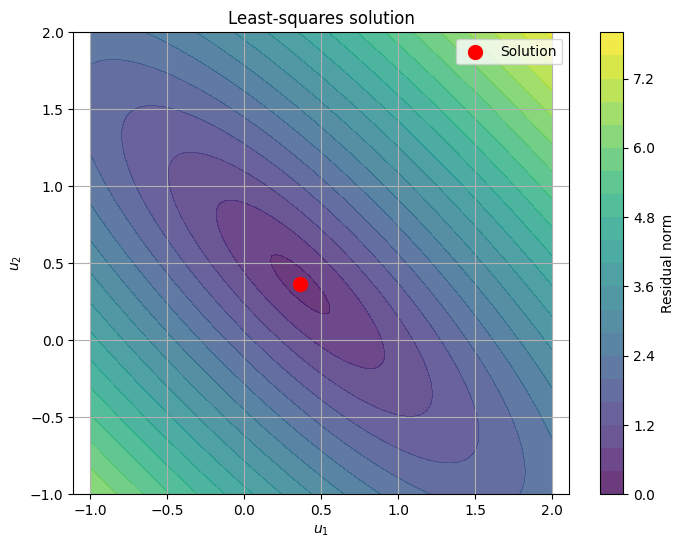

In [6]:
overdetermined_system()

# Minimum-norm solution for underdetermined systems

Task: compute a minimum-norm solution for an underdetermined system
- compute the min-norm solution with the pseudo-inverse
- compute another solution
- verify that both yield solutions and compare their norms
- visualize both solutions along the set of all possible solutions

In [7]:
def underdetermined_system():
    """Explore minimum-norm solution for an underdetermined system."""
    # Create a simple underdetermined system
    K = np.array([[1, 1]])
    f = np.array([1])
    
    # Compute the pseudo-inverse solution
    K_dagger = compute_pseudoinverse(K)
    u_pinv = K_dagger @ f
    
    # Compute a general solution 
    u_general = u_pinv + np.array([1, -1])  # u_pinv + a vector in null(K)
    
    # Check that both solutions satisfy the equation
    residual_pinv = np.linalg.norm(K @ u_pinv - f)
    residual_general = np.linalg.norm(K @ u_general - f)
    
    print("Underdetermined system (m < n):")
    print(f"Pseudo-inverse solution: {u_pinv}")
    print(f"Another valid solution: {u_general}")
    print(f"Residual for pseudo-inverse solution: {residual_pinv}")
    print(f"Residual for general solution: {residual_general}")
    print(f"Norm of pseudo-inverse solution: {np.linalg.norm(u_pinv)}")
    print(f"Norm of general solution: {np.linalg.norm(u_general)}")
    
    # Visualize the solution space
    if K.shape[0] == 1 and K.shape[1] == 2:  # Only for 2D case
        plt.figure(figsize=(8, 6))
        
        # Solution line: K[0,0]*u1 + K[0,1]*u2 = f[0]
        a, b = K[0]
        c = f[0]
        u1 = np.linspace(-1, 2, 100)
        u2 = (c - a * u1) / b if b != 0 else np.ones_like(u1) * c / a
        
        # Plot the solution line
        plt.plot(u1, u2, 'b-', label='Solution space')
        
        # Plot the minimum-norm solution
        plt.scatter(u_pinv[0], u_pinv[1], color='red', s=100, label='Minimum-norm solution')
        plt.scatter(u_general[0], u_general[1], color='green', s=100, label='Another solution')
        
        # Plot the origin
        plt.scatter(0, 0, color='black', s=50, label='Origin')
        
        # Draw a circle centered at the origin to visualize minimizing the norm
        r = np.linalg.norm(u_pinv)
        theta = np.linspace(0, 2*np.pi, 100)
        circle_x = r * np.cos(theta)
        circle_y = r * np.sin(theta)
        plt.plot(circle_x, circle_y, 'r--', alpha=0.5)
        
        plt.grid(True)
        plt.axis('equal')
        plt.title('Minimum-norm solution')
        plt.xlabel('u_1')
        plt.ylabel('u_2')
        plt.legend()
        plt.show()

Underdetermined system (m < n):
Pseudo-inverse solution: [0.5 0.5]
Another valid solution: [ 1.5 -0.5]
Residual for pseudo-inverse solution: 3.3306690738754696e-16
Residual for general solution: 3.3306690738754696e-16
Norm of pseudo-inverse solution: 0.7071067811865472
Norm of general solution: 1.5811388300841895


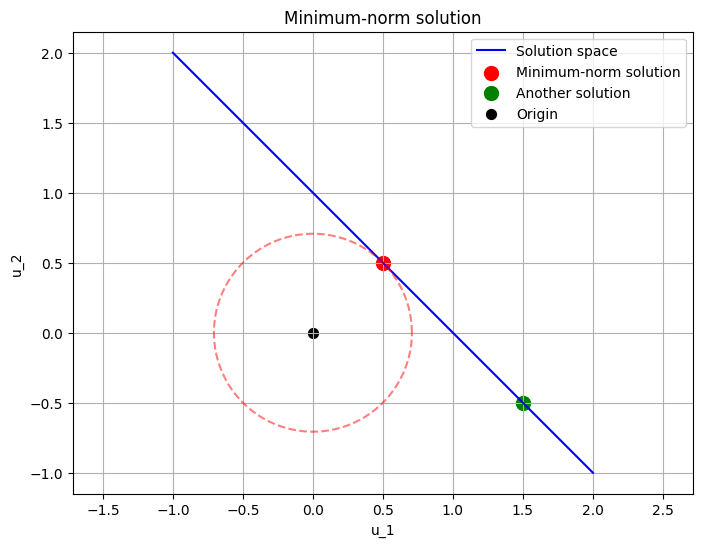

In [8]:
underdetermined_system()

# The Discrete Picard Condition
Task: check the picard condition for a toy ill-posed problem


In [12]:
def check_picard_condition(K, f, f_delta=None, sigma=None):
    """
    Check if the discrete Picard condition is satisfied.
    
    Parameters:
    -----------
    K : ndarray
        Forward operator matrix
    f : ndarray
        Exact data
    f_delta : ndarray, optional
        Noisy data
    sigma : float, optional
        Noise level
    """
    # Compute SVD
    U, s, Vh = np.linalg.svd(K, full_matrices=False)
    
    # Compute projection coefficients for exact data
    coefs_exact = np.abs(U.T @ f)
    
    plt.figure(figsize=(10, 6))
    
    # Plot singular values
    plt.semilogy(range(len(s)), s, '*', label='σ_i (singular values)')
    
    # Plot exact coefficients
    plt.semilogy(range(len(coefs_exact)), coefs_exact, 'o', 
                label='|⟨u_i,f⟩| (exact)')
    
    # Handle noisy data case
    if f_delta is not None:
        coefs_noisy = np.abs(U.T @ f_delta)
        plt.semilogy(range(len(coefs_noisy)), coefs_noisy, 'o', 
                    label='|⟨u_i,f^δ⟩| (noisy)')
        
        # Plot expected upper bound if sigma is provided
        if sigma is not None:
            expected_bound = coefs_exact + np.sqrt(2/np.pi) * sigma
            plt.semilogy(range(len(expected_bound)), expected_bound, 'k--',
                        label='Expected upper bound')
    
    plt.xlabel('i')
    plt.ylabel('Magnitude')
    plt.ylim([1e-16, 2])
    plt.xlim([0, len(s)])
    plt.legend()
    plt.title('Discrete Picard Condition Check')
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.show()

In [15]:
def ill_posed_problem_example():
    """Generate an ill-posed problem and check the Picard condition."""
    # Define forward operator (diagonal matrix with exponential decay)
    n = 100
    x = np.linspace(0, 1, n)
    K = np.diag(np.exp(-5 * x))
    
    # Define ground truth and compute exact data
    u = np.exp(-10 * x)
    f = K @ u
    
    # Add noise
    sigma = 1e-2
    np.random.seed(42)  # For reproducibility
    noise = np.random.randn(n)
    f_delta = f + sigma * noise
    
    # Check Picard condition
    check_picard_condition(K, f, f_delta, sigma)
    

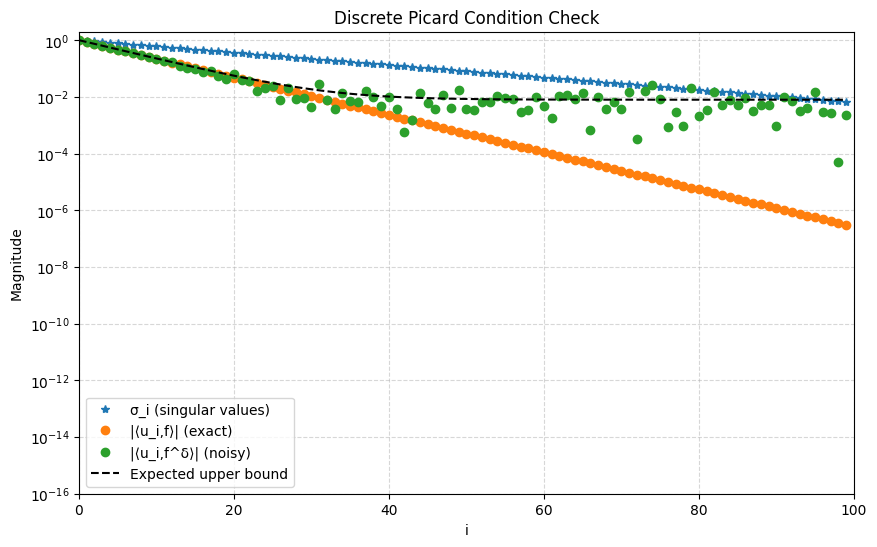

In [16]:
ill_posed_problem_example()

# Connecting Image Deblurring to the Picard Condition
Consider the code from the previous sheet that tried to deblur a noisy blurred image. Our naive approach failed even for small noise levels. How does this relate to the Picard condition? Hint: how are the Fourier coeffcients of Gaussian noise decaying? Are they decaying slower or faster than the Fourier coefficients of the Kernel?